# KMeans Clustering
https://ko.wikipedia.org/wiki/K-%ED%8F%89%EA%B7%A0_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98
https://en.wikipedia.org/wiki/Cluster_analysis

In [18]:
#2000개의 점 생성
import numpy as np

num_puntos = 2000
conjunto_puntos = []
for i in range(num_puntos):
    if np.random.random() > 0.5:
        conjunto_puntos.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
    else:
        conjunto_puntos.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])

/home/smprc/.virtualenvs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


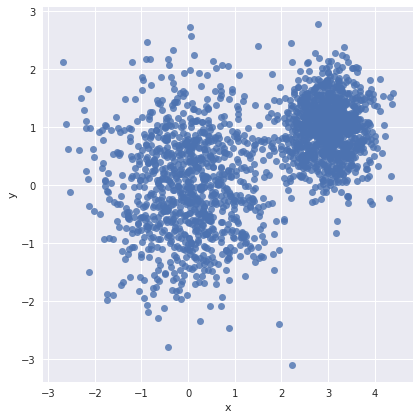

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame({"x": [v[0] for v in conjunto_puntos],
                              "y": [v[1] for v in conjunto_puntos]})
sns.lmplot("x","y",data=df, fit_reg=False, size=6)
plt.show()

In [20]:
import numpy as np
import tensorflow as tf
vectors = tf.constant(conjunto_puntos)
k = 4 
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)
print(expanded_vectors.get_shape())
print(expanded_centroids.get_shape())



(1, 2000, 2)
(4, 1, 2)


In [21]:
distances = tf.reduce_sum(
  tf.square(tf.subtract(expanded_vectors, expanded_centroids)), 2)
assignments = tf.argmin(distances, 0)

In [22]:
means = tf.concat([ tf.reduce_mean( tf.gather(vectors,  tf.reshape( tf.where( tf.equal(assignments, c) ),[1,-1]) ),reduction_indices=[1]) for c in range(k)],0) 

In [23]:
update_centroids = tf.assign(centroids, means)
init_op = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op)
    for step in range(100):
      _, centroid_values, assignment_values = sess.run([update_centroids,
                                                        centroids,
                                                        assignments])
    print("centroids")
    print(centroid_values)

centroids
[[-0.39923212 -0.85245502]
 [ 3.00813866  0.99976546]
 [-0.42312482  0.80904746]
 [ 0.9538945  -0.10850452]]


/home/smprc/.virtualenvs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


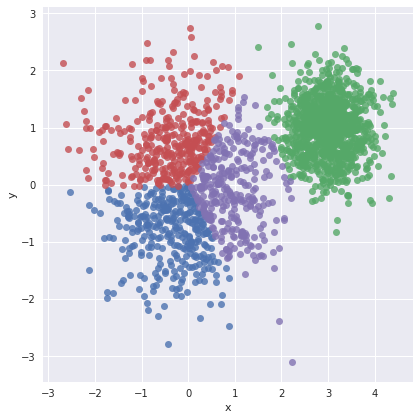

In [24]:
data = {"x": [], "y": [], "cluster": []}

for i in range(len(assignment_values)):
    data["x"].append(conjunto_puntos[i][0])
    data["y"].append(conjunto_puntos[i][1])
    data["cluster"].append(assignment_values[i])

df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, fit_reg=False, size=6, hue="cluster", legend=False)
plt.show()